Andrei Sachanka

Import necessary libs:

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

1. Primary information about the dataset:

In [3]:
def first_check(file_path):
    
    df = pd.read_excel(file_path)
    #df = pd.read_csv(file_path)
    #df = pd.read_csv(file_path, compression='zip')
    df = df.rename(columns=lambda c: c.lower().replace('-', '_').replace('/', '_').replace(' ', '_'))
 
    print()
    print('First 3 rows of the table:')
    display(df.head(3))
 
    print()
    print('Data types')
    display(df.dtypes)
 
    print()
    print('Table info')   
    print(df.info())
 
    print()
    print('Characteristics of the numbers in the table')  
    display(df.describe())
 
    print()
    print('Column names')  
    print(df.columns)
    
    return df
df = first_check('price.xlsx')


First 3 rows of the table:


,unnamed:_0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7



Data types


unnamed:_0      int64
crim          float64
zn            float64
indus         float64
chas            int64
nox           float64
rm            float64
age           float64
dis           float64
rad             int64
tax             int64
ptratio       float64
b             float64
lstat         float64
price         float64
dtype: object


Table info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unnamed:_0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  b           506 non-null    float64
 13  lstat       506 non-null    float64
 14  price       506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB
None

Characteristics of the numbers in the table


,unnamed:_0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000



Column names
Index(['unnamed:_0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'b', 'lstat', 'price'],
      dtype='object')


2. Correlation matrix to identify factors most closely related to price

In [3]:
corr = df.corr()
corr

,unnamed:_0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
unnamed:_0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465,-0.226604
crim,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626


Based on the fact that a strong correlation relationship can be considered as a relationship with a correlation coefficient higher than 0.7. In our case, the objects with such a correlation in relation to the price are the following:

rm - average number of rooms per dwelling (a correlation coefficient with price: 0.69536)

lstat - % lower status of the population (a correlation coefficient with price: -0.737663)

3. A linear regression model for the factors rm and price:

Let's select the necessary data from the dataframe:

In [5]:
rm = df[['rm','price']]
rm

,rm,price
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2
...,...,...
501,6.593,22.4
502,6.120,20.6
503,6.976,23.9
504,6.794,22.0


Check our sample for null values:

In [6]:
rm.isnull().sum()

rm       0
price    0
dtype: int64

There are no zero values in the sample. Next, we construct a correlation field to visualize the correlation between the factors rm and price:

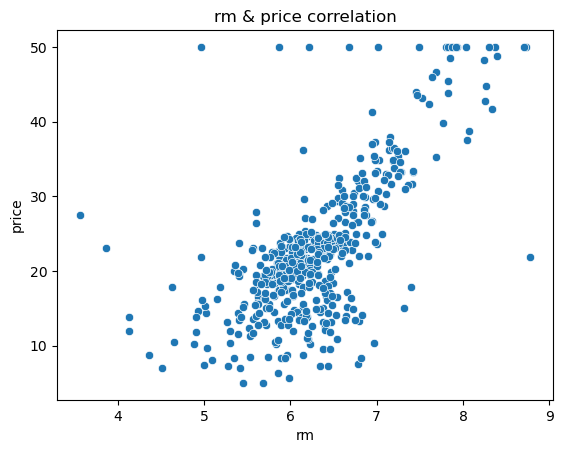

In [7]:
sns.scatterplot(data = rm, x = 'rm', y = 'price')
plt.xlabel('rm')
plt.ylabel('price')
plt.title('rm & price correlation')
plt.show()

It can be seen from the graph that there is a positive correlation between the factors (points are grouped diagonally from the lower left to the upper right corner). Next, we divide the data to build a linear regression model:

In [8]:
x = rm[['rm']]
y = rm[['price']]

We train the model:

In [9]:
regression = LinearRegression()
model = regression.fit(x, y)

Calculate the free term of the regression equation:

In [10]:
model.intercept_

array([-34.67062078])

Calculate the coefficient at x in the same equation:

In [11]:
model.coef_

array([[9.10210898]])

Calculate the coefficient of determination (R^2):

In [12]:
model.score(x, y)

0.48352545599133423

The coefficient of determination showed that the distribution of data in the sample is only 48.35% due to the following linear regression model: y = -34.67 + 9.1x and 51.65% due to the influence of other factors. The regression equation can be interpreted as follows: if the value of x increases by 1, the value of y will increase by 9.1 (coefficient value).

Next, we generate a correlation and regression analysis on the same dataset using the statsmodels.formula.api library:

In [13]:
results = smf.ols('y ~ x', rm).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           2.49e-74
Time:                        20:58:02   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

Since the obtained p-value took a value less than 0.05, we can state that the obtained regression coefficient has good significance.

We add the resulting linear regression equation to the correlation field:

<Axes: xlabel='rm', ylabel='price'>

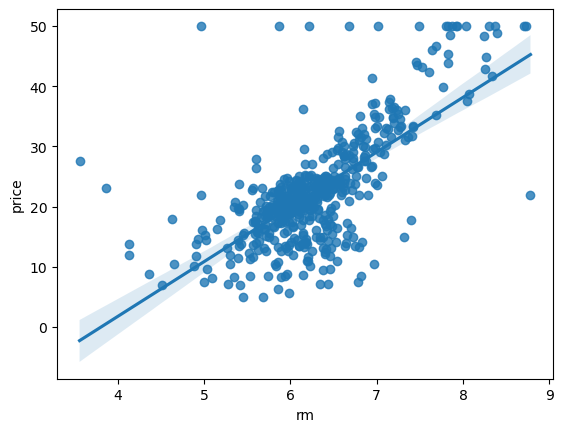

In [14]:
sns.regplot(x = rm.rm,y = rm.price, data = rm)

4. Let's build a linear regression model for the factors lstat and price:

We select the necessary data from the dataframe:

In [37]:
lstat = df[['lstat','price']]
lstat

,lstat,price
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2
...,...,...
501,9.67,22.4
502,9.08,20.6
503,5.64,23.9
504,6.48,22.0


Check our sample for null values:

In [38]:
lstat.isnull().sum()

lstat    0
price    0
dtype: int64

There are no zero values in the sample. Next, we build a correlation field to visualize the correlation between the factors lstat and price:

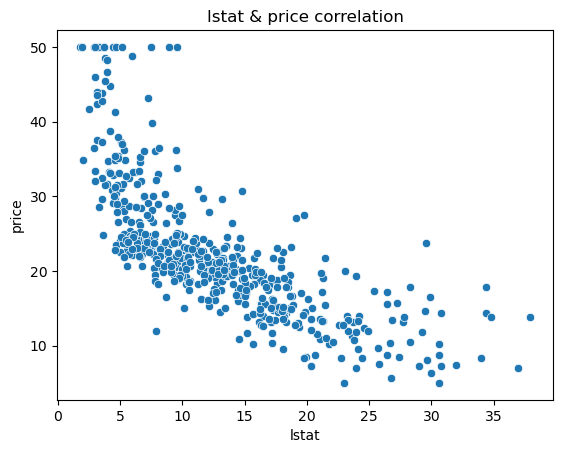

In [39]:
sns.scatterplot(data = lstat, x = 'lstat', y = 'price')
plt.xlabel('lstat')
plt.ylabel('price')
plt.title('lstat & price correlation')
plt.show()

It can be seen from the graph that there is a negative correlation between the factors (points are grouped diagonally from upper left to lower right). Next, let's divide the data to build a linear regression model:

In [40]:
x = lstat[['lstat']]
y = lstat[['price']]

We train the model:

In [41]:
regression = LinearRegression()
model = regression.fit(x, y)

Calculate the free term of the regression equation:

In [42]:
model.intercept_

array([34.55384088])

Calculate the coefficient at x in the same equation:

In [43]:
model.coef_

array([[-0.95004935]])

Calculate the coefficient of determination (R^2):

In [44]:
model.score(x, y)

0.5441462975864799

The coefficient of determination showed that the distribution of data in the sample is only 54.41% due to the following linear regression model: y = 34.55 - 0.95x and 45.59% due to the influence of other factors. The regression equation can be interpreted as follows: if the value of x increases by 1, the value of y will decrease by 0.95 (the value of the coefficient).

Next, we again generate a correlation and regression analysis on the same dataset using the statsmodels.formula.api library:

In [45]:
results = smf.ols('y ~ x', rm).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           5.08e-88
Time:                        19:24:36   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

Since the obtained p-value took a value less than 0.05, we can state that the obtained regression coefficient has good significance.

Let's add the resulting linear regression equation to the correlation field:

<Axes: xlabel='lstat', ylabel='price'>

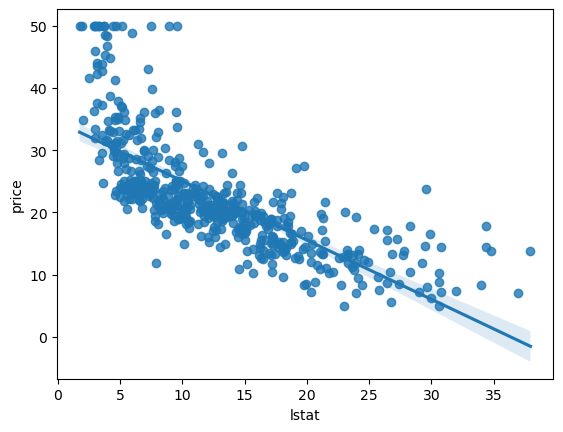

In [47]:
sns.regplot(x = lstat.lstat,y = lstat.price, data = lstat)

Comparing the coefficients of determination, we can conclude that the second linear regression model is 6 p.p. more accurate in describing the distribution of prices in the sample. The factor lstat has the strongest influence on price compared to other factors (correlation with price is the highest).